In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect("dquestProjects/factbook.db")
# curs = conn.cursor()

In [2]:
query = "SELECT * FROM sqlite_master WHERE type='table';"
query2 = "SELECT * FROM facts"
# curs.execute(query2).fetchall()
data = pd.read_sql_query(query2, conn)

In [3]:
data.head(5)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


# minimum population


In [4]:
pop_stats = '''
select 
min(population) pop_min, 
max(population) pop_max, 
min(population_growth) pop_growth_min, 
max(population_growth) pop_growth_max 
from facts
'''
pd.read_sql_query(pop_stats, conn)

,pop_min,pop_max,pop_growth_min,pop_growth_max
0,0,7256490011,0.0,4.02


# Write a query that returns the countrie(s) with a population of 0.


In [5]:
country_zero = '''
select population, COUNT(population) total from facts
Where CAST(population as float) == 0
'''
pd.read_sql_query(country_zero, conn)

,population,total
0,0,1


# Write a query that returns the countrie(s) with a population of 7256490011.


In [6]:
pop_7_bill = '''
select population, COUNT(population) Total from facts
Where CAST(population as float) == 7256490011
'''
pd.read_sql_query(pop_7_bill, conn)

,population,Total
0,7256490011,1


In [7]:
new_table = '''
select population, population_growth, birth_rate, death_rate
from facts
'''
dataset = pd.read_sql_query(new_table, conn)
dataset.head()

,population,population_growth,birth_rate,death_rate
0,32564342.0,2.32,38.57,13.89
1,3029278.0,0.30,12.92,6.58
2,39542166.0,1.84,23.67,4.31
3,85580.0,0.12,8.13,6.96
4,19625353.0,2.78,38.78,11.49


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


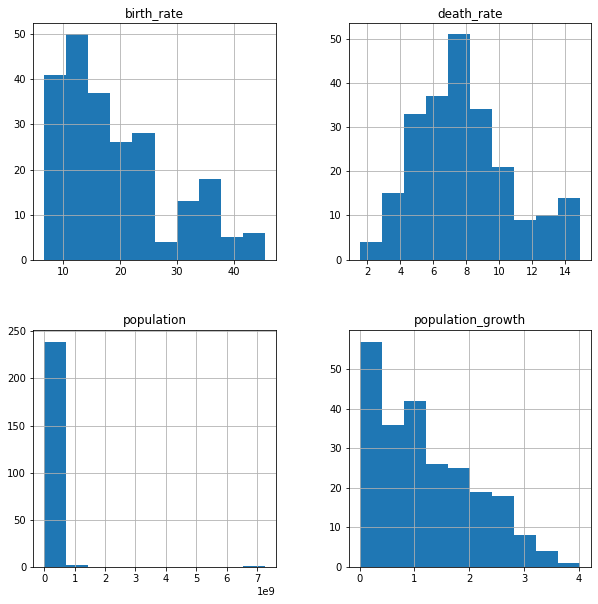

In [8]:
fig = plt.figure(figsize = (10,10));
ax = fig.add_subplot(111);
dataset.hist(ax=ax);

# Which countries have the highest population density?


In [17]:
density = '''
select name, population, area_land, ((CAST(population as float)) / (CAST(area as float))) as density
from facts
order by density desc
'''
density_data = pd.read_sql_query(density, conn)
density_data.head()

,name,population,area_land,density
0,Macau,592731.0,28.0,21168.964286
1,Monaco,30535.0,2.0,15267.500000
2,Singapore,5674472.0,687.0,8141.279770
3,Hong Kong,7141106.0,1073.0,6445.041516
4,Gaza Strip,1869055.0,360.0,5191.819444


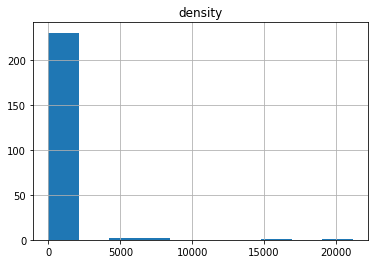

In [20]:
new_density = density_data[["name","density"]]
new_density.hist();